# A. Предсказание движения беспилотного автомобиля

Когда в XIX веке на улицах Великобритании появились первые самоходные повозки, они вызвали у людей скорее страх и недоверие, чем восторг. Поэтому в 1865 году в Великобритании был принят The Locomotive Act, более известный как Red Flag Act, который требовал, чтобы перед каждым автомобилем шёл человек с красным флажком или фонарём. Этот «предвестник прогресса» должен был предупреждать пешеходов и конные экипажи о приближении нового механического транспорта.

Кроме того, закон строго ограничивал скорость автомобилей: не более 2 миль в час в городах и 4 миль в час за их пределами. Эти меры были направлены на то, чтобы адаптировать общество к новым транспортным средствам и минимизировать их риски для безопасности. К концу XIX века стало очевидно, что подобные ограничения только сдерживают прогресс, и в 1896 году Red Flag Act был отменён, а автомобили получили право двигаться быстрее и без «предвестника», предсказывающего появление автомобиля.

Сегодня предсказание маршрута автомобиля стало делом не человека с флажком, а искусственного интеллекта. ИИ способен опираться на огромное количество данных — от состояния дорог и трафика до погодных условий и угла поворота колёс — чтобы не просто направить автомобиль, а выбрать для него наилучший маршрут.

Ваша задача — обучить модель, позволяющую точно моделировать траекторию движения автомобиля на основе поступающих команд управления, технических характеристик и исторических данных о прошлых проездах транспорта по различным дорогам.

## Данные для обучения
Архив YaCupTrain.tar содержит набор из N train записанных сцен проезда легкового автомобиля, разложенных по отдельным папкам. Каждая папка содержит 3 файла:

- metadata.json: содержит общую информацию про сцену
- ride_date — дата проезда
- vehicle_id — уникальный идентификатор автомобиля
- vehicle_model — идентификатор модели автомобиля
- vehicle_model_modification — идентификатор модификации указанной модели автомобиля
- tires — идентификатор типа шин, используемых для колёс передней (front) и задней (rear) оси автомобиля
- location_reference_point_id — идентификатор референсной точки, используемой в качестве начала отсчёта координат в файле localization.csv
- localization.csv: описывает траекторию движения автомобиля на данной 60-секундной сцене. Представляет собой csv файл, каждая строчка которого имеет формат
stamp_ns — время в наносекундах от начала сцены
x, y, z — координаты центра задней оси автомобиля. Считаются в метрах от указанной референсной точки сцены. Направления осей относительно референсной точки: 
x - на восток, 
y - на север, 
z - в небо
roll, pitch, yaw — углы Эйлера в радианах, описывающие ориентацию автомобиля в пространстве. Угол yaw считается относительно оси 
x в направлении оси y.
- control.csv: описывает последовательность команд управления, отправленных автомобилю на протяжении данной сцены.
- stamp_ns — время в наносекундах от начала сцены
- acceleration_level — желаемая интенсивность ускорения. Положительные значения соответствуют силе нажатия на педаль газа, отрицательные — силе нажатия на педаль тормоза
- steering — желаемый угол поворота руля в градусах относительно центрального положения
Обратите внимание, что диапазон значений acceleration_level зависит от модели автомобиля. Также, важно отметить, что данные команды описывают желаемое целевое состояние элементов управления в указанный момент времени, и не обязательно исполняются мгновенно.

## Данные для тестирования
Архив YaCupTest.tar содержит набор из N test    сцен, для которых требуется предсказать новую траекторию автомобиля на основе начального состояния и поступающих команд управления. Каждая папка с тестовым сценарием содержит 4 файла:

- metadata.json: содержит общую информацию про сцену аналогично обучающим данным
- localization.csv: описывает траекторию движения автомобиля в течении первых 5 секунд сцены. Формат аналогичен обучающим данным.
- control.csv: описывает последовательность команд управления в течении первых 20 секунд сцены. Формат аналогичен обучающим данным.
- requested_stamps.csv: содержит одну колонку stamp_ns, содержащую список из T n  моментов времени от начала сцены (в наносекундах) в интервале с 5 по 20 секунду, для которых требуется предсказать положение автомобиля.

## Формат вывода
В качестве решения вам необходимо отправить один файл в формате *.csv, содержащий следующие 5 колонок:

- testcase_id — номер сцены из тестового набора (имя папки от 0 до N test −1)
- stamp_ns — моменты времени из соответствующего файла requested_stamps.csv тестовой сцены.
- x, y, yaw — 3 колонки с предсказанными координатами положения машины и её ориентации на плоскости в указанные моменты времени (В формате аналогичном входным данным).
Таким образом, общее количество строк с предсказаниями в файле с ответом должно совпадать с суммарным количеством таймстемпов в файлах requested_stamps.csv.

- x, y, yaw target

## Calculate metric

Let's describe final metric. As a first step, all predicted triples $(x,y,yaw)$ are being converted into 2 points $[(x_1, y_1), (x_2, y_2)]$ in the following way:
$$
(x_1, y_1) = (x, y), \\
(x_2, y_2) = (x_1, y_1) + S \times (yaw_x, yaw_y)
$$  

where $S = 1$. In other words, we build a directed segment of length $1$. These points then used in the metric calculation.


Metric for a single pose (rmse):

$$
pose\_metric = \sqrt{ \frac{\displaystyle\sum_{j=1}^{k} {(x_j-\hat{x_j})^2 + (y_j-\hat{y_j})^2}}{k} }
$$

where $k$ - number of points that describe single pose (in our case $k=2$).

Metric for a testcase:

$$
testcase\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}pose\_metric_i
$$

where $n$ - number of localization points to predict.

And, final metric for a whole dataset:

$$
dataset\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}testcase\_metric_i
$$

where $n$ - number of test cases.


## Import libraries

In [1]:
import json
import pandas as pd
import os
import sklearn
import datetime
import numpy as np

from pprint import pprint

import clickhouse_connect

from pydantic import BaseModel, Field
from typing import List, Dict, Any, Optional

# eda

import phik


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time
from time import sleep
from datetime import datetime as dt
import pytz

# ml
import xgboost as xgb
import catboost as ctb

import optuna
from optuna.visualization.matplotlib import plot_param_importances

import mlflow


# mlflow.set_experiment('price_meas23_pred')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline as skl_pipeline

from sklearn.base import BaseEstimator, TransformerMixin

# from imblearn.pipeline import Pipeline as imb_pipeline
# from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, OrdinalEncoder, StandardScaler, RobustScaler

sklearn.set_config(transform_output='pandas')

# load metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error as mae, mean_absolute_percentage_error as mape

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv()

# set all columns to be displayed
pd.set_option('display.max_columns', None)

# import tools

from tools import pd_tools
from tools import spark_tools
from tools.create_db_table_from_df import sql_create_table_from_pd


root_path = "."
tmp_path = f'{root_path}/tmp'
data_path = f'{root_path}/data/self-drive'
data_train_path = f'{data_path}/train_data'
data_test_path = f'{data_path}/test_data'
tmp_data_path=f'{data_path}/tmp_data'

# constants
CH_USER = os.getenv("CH_USER")
CH_PASS = os.getenv("CH_PASS")
CH_IP = os.getenv('CH_IP')
RAND_ST = 354
# MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

your_mlflow_tracking_uri = f'{root_path}/mlruns' # for docker mlflow server
# your_mlflow_tracking_uri = "http://127.0.0.1:5000" # for local mlflow server
# your_mlflow_tracking_uri = MLFLOW_TRACKING_URI # for remote mlflow server
mlflow.set_tracking_uri(your_mlflow_tracking_uri)


ch_client = clickhouse_connect.get_client(host=CH_IP, port=8123, username=CH_USER, password=CH_PASS)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


## Initilize Spark

In [53]:
import findspark
findspark.init()

from pyspark import SparkContext, SparkConf, SQLContext

from pyspark.sql import SparkSession, functions as F, Window
from pyspark.sql.types import IntegerType, DoubleType, StructType, StructField, StringType, ArrayType, FloatType
from pyspark.sql import DataFrame as SparkDataFrame

# ml
from pyspark.ml import Pipeline as spk_pipeline
from pyspark.ml.feature import OneHotEncoder as spk_OneHotEncoder, StandardScaler as spk_StandardScaler, VectorAssembler as spk_VectorAssembler
from pyspark.ml.feature import MinMaxScaler as spk_MinMaxScaler, StringIndexer as spk_StringIndexer
from pyspark.mllib.evaluation import RegressionMetrics


import os
#https://repo1.maven.org/maven2/com/github/housepower/clickhouse-native-jdbc/2.7.1/clickhouse-native-jdbc-2.7.1.jar
packages = [
    "com.github.housepower:clickhouse-spark-runtime-3.4_2.12:0.7.3"
    ,"com.clickhouse:clickhouse-jdbc:0.6.0-patch5"
    ,"com.clickhouse:clickhouse-http-client:0.6.0-patch5"
    ,"org.apache.httpcomponents.client5:httpclient5:5.3.1"
    ,"com.github.housepower:clickhouse-native-jdbc:2.7.1"
    ,"ai.catboost:catboost-spark_3.4_2.12:1.2.7"

]
ram = 30
cpu = 22*3
# Define the application name and setup session
appName = "Connect To ClickHouse via PySpark"
spark = (SparkSession.builder
         .appName(appName)
         .config("spark.jars.packages", ",".join(packages))
         .config("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
         .config("spark.sql.catalog.clickhouse.host", CH_IP)
         .config("spark.sql.catalog.clickhouse.protocol", "http")
         .config("spark.sql.catalog.clickhouse.http_port", "8123")
         .config("spark.sql.catalog.clickhouse.user", CH_USER)
         .config("spark.sql.catalog.clickhouse.password", CH_PASS)
         .config("spark.sql.catalog.clickhouse.database", "default")
        #  .config("spark.spark.clickhouse.write.compression.codec", "lz4")
        #  .config("spark.clickhouse.read.compression.codec", "lz4")
        #  .config("spark.clickhouse.write.format", "arrow")
         #    .config("spark.clickhouse.write.distributed.convertLocal", "true") l
         #    .config("spark.clickhouse.write.repartitionNum", "1") 
         #.config("spark.clickhouse.write.maxRetry", "1000")
         #    .config("spark.clickhouse.write.repartitionStrictly", "true") 
         #    .config("spark.clickhouse.write.distributed.useClusterNodes", "false") 
        #  .config("spark.clickhouse.write.batchSize", "1000000")
         #.config("spark.sql.catalog.clickhouse.socket_timeout", "600000000")
        #  .config("spark.sql.catalog.clickhouse.connection_timeout", "600000000")
        #  .config("spark.sql.catalog.clickhouse.query_timeout", "600000000")
        #  .config("spark.clickhouse.options.socket_timeout", "600000000")
        #  .config("spark.clickhouse.options.connection_timeout", "600000000")
        #  .config("spark.clickhouse.options.query_timeout", "600000000")         
         .config("spark.executor.memory", f"{ram}g")
        #  .config("spark.executor.cores", "5")
         .config("spark.driver.maxResultSize", f"{ram}g")
        #  .config("spark.driver.memory", f"{ram}g")
        #  .config("spark.executor.memoryOverhead", f"{ram}g")
        #  .config("spark.sql.debug.maxToStringFields", "100000")
         .getOrCreate()
         )
#SedonaRegistrator.registerAll(spark)
# spark.conf.set("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
# spark.conf.set("spark.sql.catalog.clickhouse.host", "127.0.0.1")
# spark.conf.set("spark.sql.catalog.clickhouse.protocol", "http")
# spark.conf.set("spark.sql.catalog.clickhouse.http_port", "8123")
# spark.conf.set("spark.sql.catalog.clickhouse.user", "default")
# spark.conf.set("spark.sql.catalog.clickhouse.password", "")
# spark.conf.set("spark.sql.catalog.clickhouse.database", "default")
from catboost_spark import CatBoostRegressor as spk_CatBoostRegressor

spark.sql("use clickhouse")

DataFrame[]

## Data load

In [3]:
# read folder names in path
def read_names(path: str):
    '''Read folder names or file names in the path'''
    return os.listdir(path)

train_ids = pd.Series(read_names(data_train_path)).apply(int)
test_ids = pd.Series(read_names(data_test_path)).apply(int)
train_ids = train_ids.sort_values().reset_index(drop=True)
train_ids



0            0
1            1
2            2
3            3
4            4
         ...  
41995    41995
41996    41996
41997    41997
41998    41998
41999    41999
Length: 42000, dtype: int64

In [4]:
files_temp = read_names(f'{data_train_path}/{train_ids[0]}')
files_temp

['control.csv', 'localization.csv', 'metadata.json']

In [5]:
control_temp = pd.read_csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}')
control_temp.head()

,stamp_ns,acceleration_level,steering
0,2987440736,-114,-2.655140
1,3027341070,-123,-2.598169
2,3066793076,-132,-2.544422
3,3106757146,-141,-2.544422
4,3146784622,-147,-2.488557


In [6]:
localization_temp = pd.read_csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}')
localization_temp.head()

,stamp_ns,x,y,z,roll,pitch,yaw
0,0,-4292.313705,-14527.266319,66.043314,0.003926,-0.054198,-1.936810
1,39989868,-4292.489928,-14527.726083,66.070022,0.003702,-0.054172,-1.936858
2,79819886,-4292.662729,-14528.183063,66.090338,0.002404,-0.054628,-1.936827
3,125154671,-4292.862032,-14528.702952,66.120814,0.002709,-0.054559,-1.936894
4,159636974,-4293.011898,-14529.097871,66.138226,0.003264,-0.053668,-1.936876


In [7]:
metadata_temp = pd.read_json(f'{data_train_path}/{train_ids[0]}/{files_temp[2]}')
metadata_temp

,ride_date,tires,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id
front,2022-03-14,0,0,0,0,0
rear,2022-03-14,0,0,0,0,0


### Create functions for load data

In [8]:
def make_sp_df_id(control:pd.DataFrame, localization:pd.DataFrame, metadata:pd.DataFrame) -> SparkDataFrame:
    '''Make a model spark dataframe for from control, localization and metadata dataframes for a single id'''

    def find_min_max(control:pd.DataFrame, localization:pd.DataFrame):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        control['loc_stamp_max'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] >= x]['stamp_ns'].min())
        control['loc_stamp_min'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] < x]['stamp_ns'].max())
        control_2m = control.copy()
        return control_2m

    def merge_min_max(control_2m:pd.DataFrame, localization:pd.DataFrame):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        control_3m = (control_2m.merge(localization, left_on='loc_stamp_max', right_on='stamp_ns', how='left', suffixes=('', '_max'))
                    .merge(localization, left_on='loc_stamp_min', right_on='stamp_ns', how='left', suffixes=('', '_min'))
        )
        control_3m.rename(columns={'x':'x_max', 'y':'y_max', 'z':'z_max', 'roll':'roll_max', 'pitch':'pitch_max', 'yaw':'yaw_max'}, inplace=True)
        control_3m.drop(columns=['loc_stamp_max', 'loc_stamp_min'], inplace=True)
        return control_3m

    def interpolate_coords(control_3m, col_min:str, col_max:str):
        '''Interpolate values between max and min values'''
        control_inter = (control_3m[['stamp_ns', 'stamp_ns_max', 'stamp_ns_min', col_min, col_max]]
                    .apply(lambda x: (x['stamp_ns'] - x['stamp_ns_min']) / (x['stamp_ns_max'] - x['stamp_ns_min']) * (x[col_max] - x[col_min]) + x[col_min], axis=1)
                    )
        return control_inter

    control_2m = find_min_max(control, localization)
    control_3m = merge_min_max(control_2m, localization)

    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    contr_cols = ['stamp_ns', 'acceleration_level', 'steering']

    for col in coords_cols:
        control_3m[col] = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')

    control_inter = control_3m[contr_cols + coords_cols]


    def tires_to_columns_date(metadata:pd.DataFrame):
        '''Change tires column to front and rear columns and 
        convert ride_date to datetime and add year, month, day columns'''
        metadata['front_tire'] = metadata['tires'][0]
        metadata['rear_tire'] = metadata['tires'][1]
        metadata = metadata.drop(columns=['tires']).reset_index(drop=True).loc[:0]
        # convert ride_date to datetime and add year, month, day columns
        metadata['ride_date'] = pd.to_datetime(metadata['ride_date'])
        metadata['ride_year'] = metadata['ride_date'].dt.year
        metadata['ride_month'] = metadata['ride_date'].dt.month
        metadata['ride_day'] = metadata['ride_date'].dt.day
        metadata = metadata.drop(columns=['ride_date'])
        
        return metadata

    # add metada to each row in control dataframe
    def add_metadata(control:pd.DataFrame, metadata:pd.DataFrame):
        '''Add metada to each row in control dataframe'''
        # Make a copy to avoid SettingWithCopyWarning
        control_model = control.copy()
        for col in metadata.columns:
            control_model[col] = metadata.loc[0, col]  # Set the entire column in the copy
        
        return control_model


    
    metadata_m = tires_to_columns_date(metadata)

    # create spark dataframe for model
  
    control_model = spark.createDataFrame(add_metadata(control_inter, metadata_m))

    return control_model


In [9]:
def metadata_sp_read(data_path:str, ids:pd.Series, n_ids:int, meatadata_file:str) -> SparkDataFrame:
    '''Read metadata json file in spark'''
    metadata_schema = StructType([
        StructField("ride_date", StringType(), True),
        StructField("tires", StructType([
            StructField("front", IntegerType(), True),
            StructField("rear", IntegerType(), True)
        ]), True),
        StructField("vehicle_id", IntegerType(), True),
        StructField("vehicle_model", IntegerType(), True),
        StructField("vehicle_model_modification", IntegerType(), True),
        StructField("location_reference_point_id", IntegerType(), True)
    ])

    metadata = (spark.read.json(f'{data_path}/{ids[n_ids]}/{meatadata_file}', schema=metadata_schema, multiLine=True)
                .withColumn('front_tire', F.col('tires.front'))
                .withColumn('rear_tire', F.col('tires.rear'))
                .withColumn('ride_year', F.year('ride_date'))
                .withColumn('ride_month', F.month('ride_date'))
                .withColumn('ride_day', F.dayofmonth('ride_date'))
                .drop('tires', 'ride_date')
    )
    
     
    return metadata


In [10]:
# read data in each file with spark
def make_sp_df_all_ids(path: str, ids: pd.Series, files: list):
    '''Read data in each file with spark'''
    data = []
    for i in ids:
        for file in files:
            if file == 'control.csv':
                control = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'localization.csv':
                localization = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'metadata.json':
                metadata = pd.read_json(f'{path}/{i}/{file}')
        data.append(make_sp_df_id(control, localization, metadata).withColumn('id', F.lit(i)))
    
    # Concatenate all DataFrames in the list
    data_all = data[0]
    for df in data[1:]:
        data_all = data_all.unionByName(df)
     
    return data_all

In [11]:
ids = train_ids[:10]
files = ['control.csv', 'localization.csv', 'metadata.json']
data_all = make_sp_df_all_ids(data_train_path, ids, files)
data_all.show(5)

+----------+------------------+-------------------+------------------+-------------------+-----------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|  stamp_ns|acceleration_level|           steering|                 x|                  y|                z|                roll|               pitch|                yaw|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day| id|
+----------+------------------+-------------------+------------------+-------------------+-----------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|2987440736|              -114| -2.655139533023165|-4305.325027045072|-14560.80063

## EDA

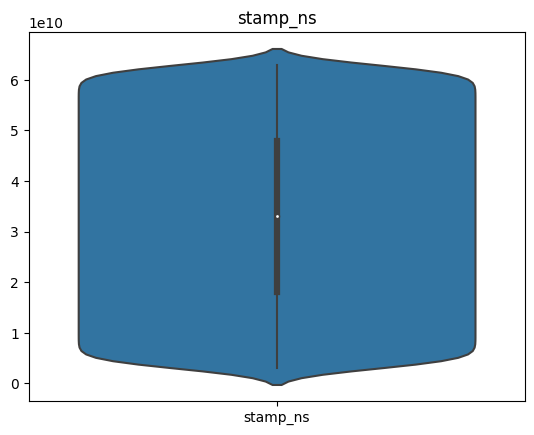

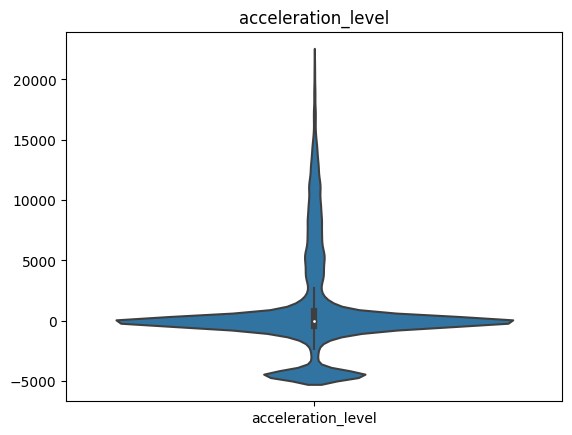

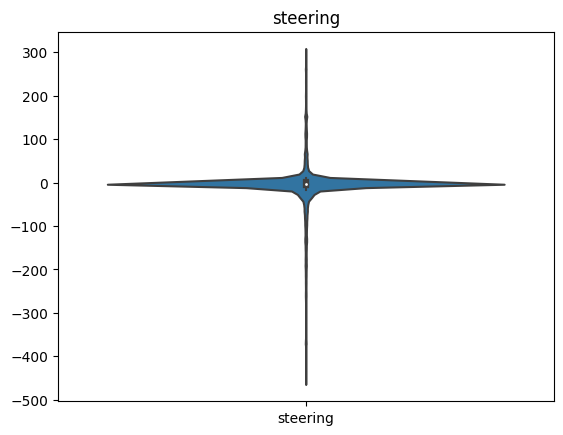

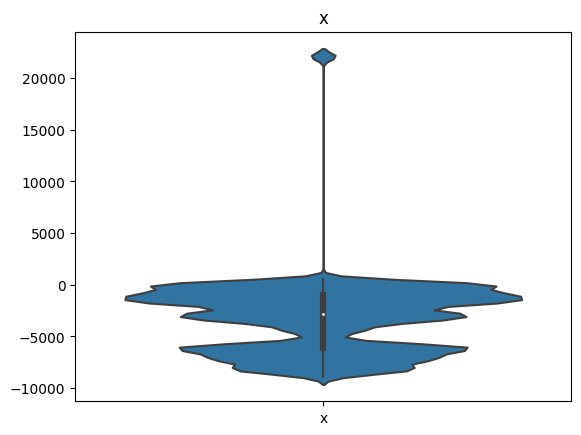

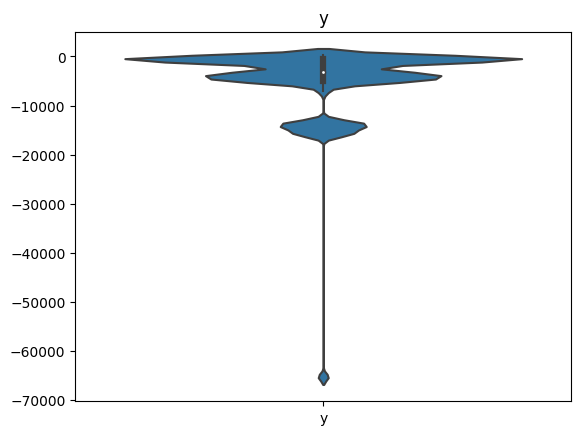

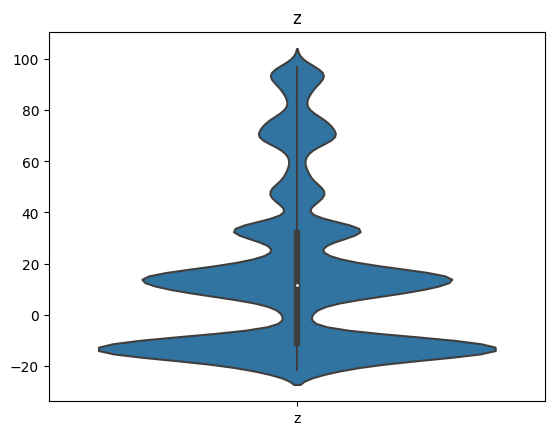

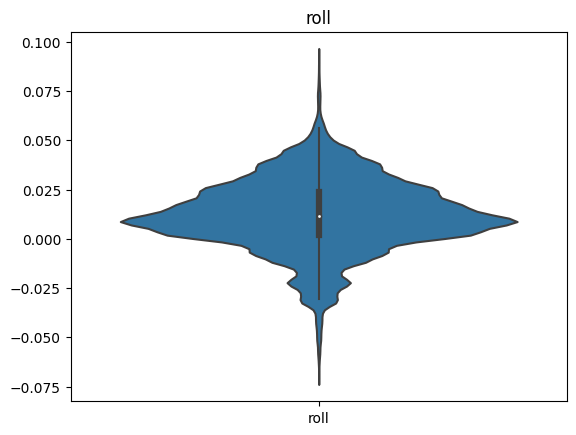

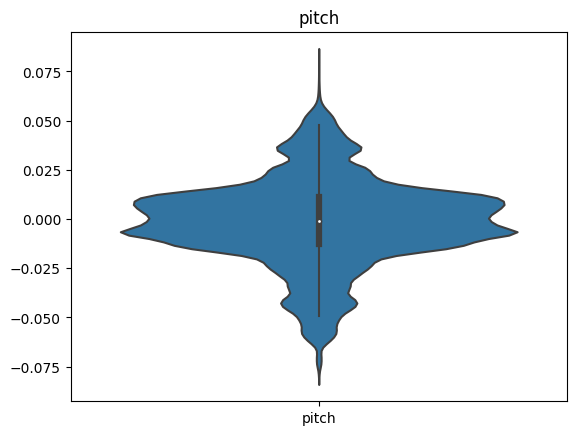

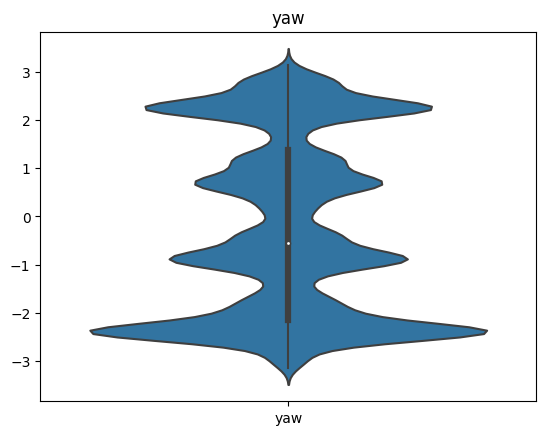

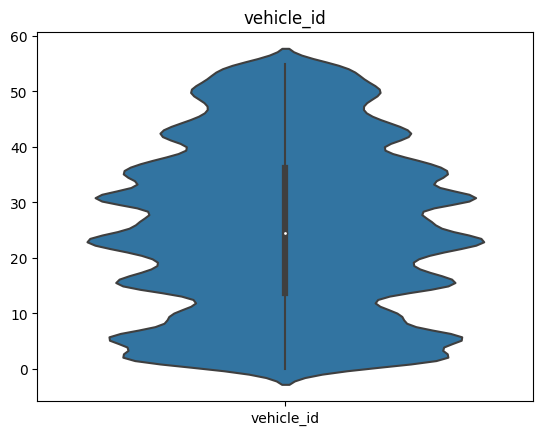

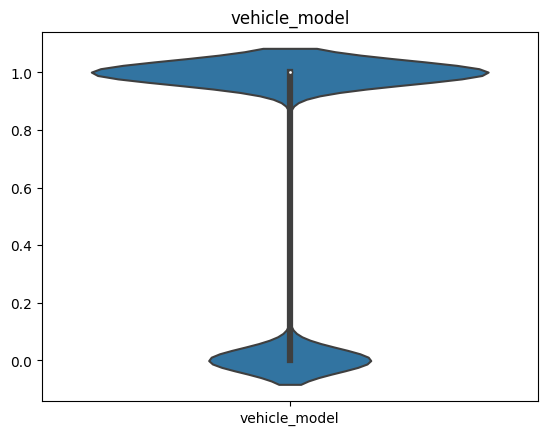

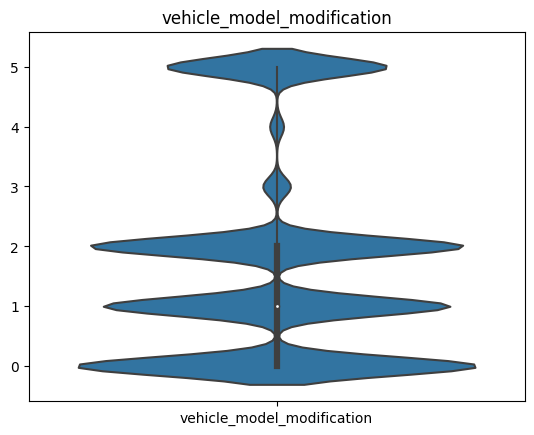

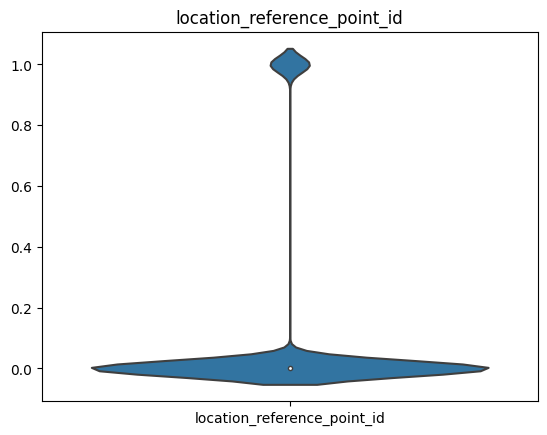

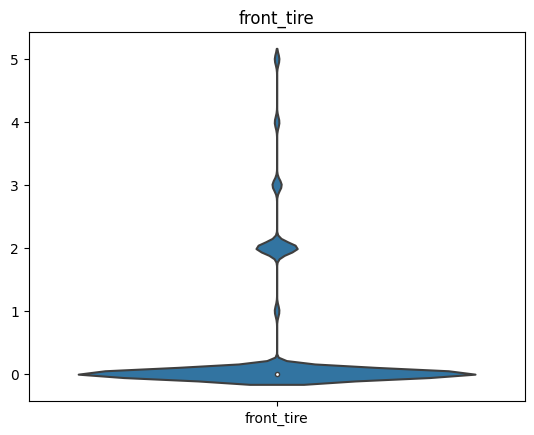

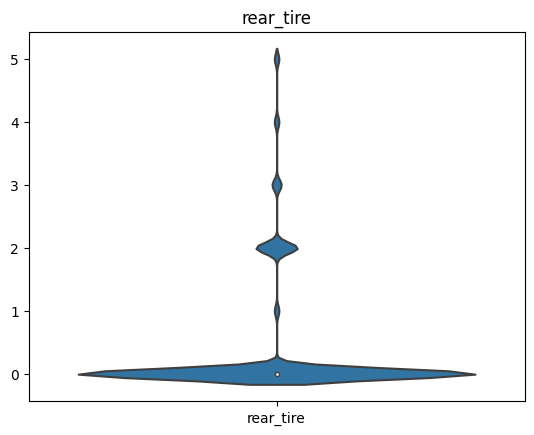

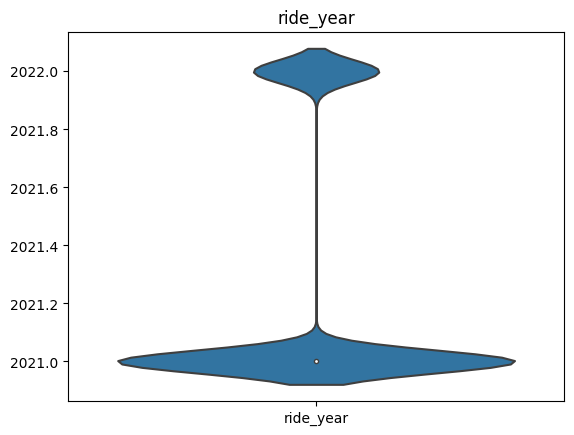

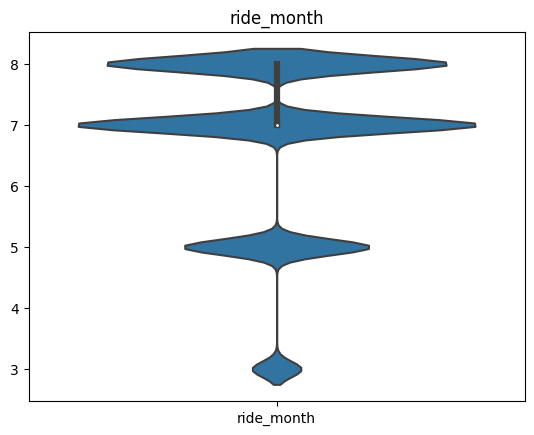

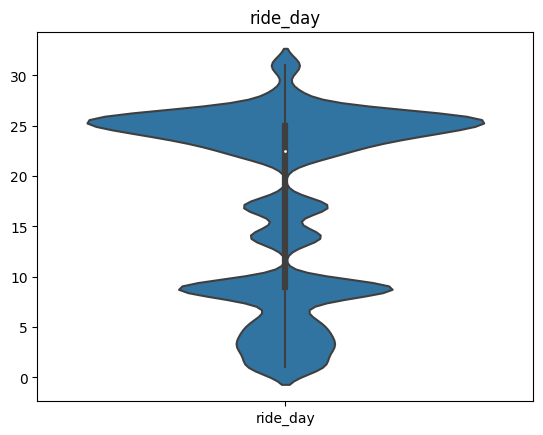

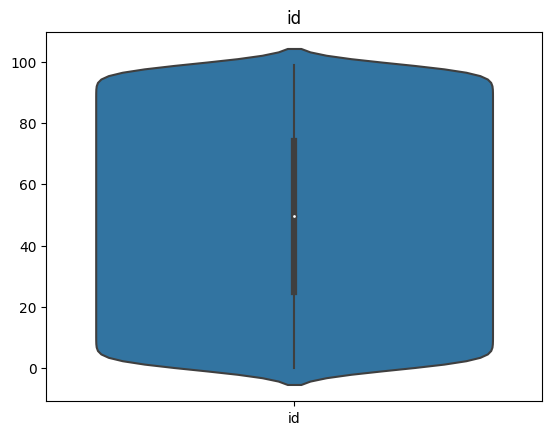

In [12]:
for col in data_all.columns:
    sns.violinplot(data=data_all.select(col).toPandas())
    plt.title(col)
    plt.show()


## Train test split

In [12]:
data_all_train, data_all_test = data_all.randomSplit(weights=[0.8,0.2], seed=RAND_ST)

In [18]:
data_all_train.show(5)

+----------+------------------+-------------------+-------------------+-------------------+-----------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|  stamp_ns|acceleration_level|           steering|                  x|                  y|                z|                roll|               pitch|                yaw|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day| id|
+----------+------------------+-------------------+-------------------+-------------------+-----------------+--------------------+--------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+---+
|2987440736|              -114| -2.655139533023165| -4305.325027045072|-14560.8

In [22]:
not_target = ['z', 'roll', 'pitch', 'id']

train_features = data_all_train.drop(*not_target, 'x', 'y', 'yaw')
test_features = data_all_test.drop(*not_target, 'x', 'y', 'yaw')

# concat features and target for use in catboost spark
train_features_target_x = data_all_train.drop(*not_target, 'y', 'yaw')
test_features_target_x = data_all_test.drop(*not_target, 'y', 'yaw')

train_features_target_y = data_all_train.drop(*not_target, 'x', 'yaw')
test_features_target_y = data_all_test.drop(*not_target, 'x', 'yaw')

train_features_target_yaw = data_all_train.drop(*not_target, 'x', 'y')
test_features_target_yaw = data_all_test.drop(*not_target, 'x', 'y')

In [23]:
train_features_target_x.show(5)

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+
|2987440736|              -114| -2.655139533023165| -4305.325027045072|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|
|3027341070|              -123|-2.5981690804828066| -4305.489154772268|         0|            0|                         0|                          0|         0|        0|     2022|      

## Make pipeline for each target

In [ ]:
# set features cols
cat_cols = [
    'front_tire'
    ,'rear_tire'
    ,'vehicle_id'
    ,'vehicle_model'
    ,'vehicle_model_modification'
    ,'location_reference_point_id'
    ,'ride_year'
    ,'ride_month'
    ,'ride_day'
    ]
num_cols = [
    'stamp_ns'
    ,'acceleration_level'
    ,'steering' 
    ]

# Assuming numeric_cols are the names of your numeric columns
# StandardScaler for numeric columns

# preprocessor
# power to yeloyjhonson



# VectorAssembler is used to combine all transformed features into a single feature vector required by Spark MLlib for model training.
# Assemble all features into a single vector
assembler = spk_VectorAssembler(
    inputCols=cat_cols + num_cols,
    outputCol="features"
)


# Full preprocessing pipeline
preprocessing_pipeline = spk_pipeline(stages=[assembler])

train_data = train_features_target_x
test_data = test_features_target_x

# Fit and transform the data
preprocessor = preprocessing_pipeline.fit(train_data)
train_data_transformed = preprocessor.transform(train_data)
test_data_transformed = preprocessor.transform(test_data)

# one experiment for one x, y, yaw

model = spk_CatBoostRegressor(
    iterations=100
    ,depth=6
    ,lossFunction='RMSE'
    ,evalMetric='RMSE'    
    ,featuresCol='features'
    ,labelCol='x'
    
)

# model.setFeaturesCol("features")

# Fit the model to the training data

# model = model.fit(train_data_transformed, evalDatasets=[test_data_transformed.select('features')])

model = model.fit(train_data_transformed)

# predict
model.transform(test_data_transformed.select('features')).show()



# The numeric features are transformed using a PowerTransformer.



[CatBoost Master] SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
[CatBoost Master] SLF4J: Defaulting to no-operation (NOP) logger implementation
[CatBoost Master] SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


Learning rate set to 0.349549
0:	learn: 2179.8555358	total: 19.7ms	remaining: 1.95s
1:	learn: 1460.7725920	total: 38.6ms	remaining: 1.89s
2:	learn: 982.1544119	total: 59.8ms	remaining: 1.93s
3:	learn: 683.8604021	total: 82.5ms	remaining: 1.98s
4:	learn: 510.7207289	total: 102ms	remaining: 1.95s
5:	learn: 359.0520854	total: 118ms	remaining: 1.85s
6:	learn: 262.4562068	total: 135ms	remaining: 1.79s
7:	learn: 207.8614981	total: 154ms	remaining: 1.77s
8:	learn: 167.0585277	total: 172ms	remaining: 1.74s
9:	learn: 138.6388684	total: 190ms	remaining: 1.71s
10:	learn: 116.2128506	total: 210ms	remaining: 1.7s
11:	learn: 102.5834488	total: 226ms	remaining: 1.65s
12:	learn: 88.8172985	total: 242ms	remaining: 1.62s
13:	learn: 80.7873256	total: 260ms	remaining: 1.6s
14:	learn: 70.7717402	total: 277ms	remaining: 1.57s
15:	learn: 65.5863418	total: 294ms	remaining: 1.54s
16:	learn: 59.2587953	total: 313ms	remaining: 1.53s
17:	learn: 52.4437994	total: 329ms	remaining: 1.5s
18:	learn: 48.2931515	total: 

In [50]:
test_data_transformed.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|(12,[6,7,8,9,10,1...|
|(12,[6,7,8,9,10,1...|
|(12,[6,7,8,9,10,1...|
|(12,[6,7,8,9,10,1...|
|(12,[6,7,8,9,10,1...|
+--------------------+
only showing top 5 rows



In [51]:
model.transform(test_data_transformed.select('features')).show()

+--------------------+-------------------+
|            features|         prediction|
+--------------------+-------------------+
|(12,[6,7,8,9,10,1...| -4308.517536114145|
|(12,[6,7,8,9,10,1...|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4308.5590955020125|
|(12,[6,7,8,9,10,1...| -4309.996531935143|
|(12,[6,7,8,9,10,1...|  -4310.41489397053|
|(12,[6,7,8,9,10,1...| -4313.299044611756|
|(12,[6,7,8,9,10,1...| -4311.422879668074|
|(12,[6,7,8,9,10,1...| -4311.083634096052|
|(12,[6,7,8,9,10,1...| -4308.790500385839|
|(12,[6,7,8,9,10,1...| -4311.083634096052|
|(12,[6,7,8,9,10,1...| -4306.779122804333|
|(12,[6,7,8,9,10,1...| -4327.703634982605|
|(12,[6,7,8,9,10,1...| -4327.179899604206|
|(12,[6,7,8,9,10,1...| -4323.841352893913|
|(12,[6,7,8,9,10,1...| -4318.379575575284|
|(12,[6,7,8,9,10,1...| -4318.379575575284|
|(12,[6,7,8,9,10,1...| -4312.433667227359|
|(12,[6,7,8,9,10,1...| -4312.433667227359|
|(12,[6,7,8,9,10,1...| -4312.433667227359|
+----------

In [33]:
test_data_transformed.show()

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|3066793076|              -132|-2.5444222994575325| -4305.652096671342|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3267384871|              -162| -2.382064004182096|  -4306.46547426193|         0|            0|        

In [ ]:
model.predict(test_data_transformed.select('features')).show()

Py4JJavaError: An error occurred while calling o750.predict.
: java.lang.ClassCastException: class org.apache.spark.sql.Dataset cannot be cast to class org.apache.spark.ml.linalg.Vector (org.apache.spark.sql.Dataset and org.apache.spark.ml.linalg.Vector are in unnamed module of loader 'app')
	at ai.catboost.spark.CatBoostRegressionModel.predict(CatBoostRegressor.scala:67)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.base/java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Unknown Source)


In [27]:
train_data_transformed.show(5)

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|2987440736|              -114| -2.655139533023165| -4305.325027045072|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3027341070|              -123|-2.5981690804828066| -4305.489154772268|         0|            0|        

In [17]:
# train_data_transformed.select('features').show()
# .withColumnRenamed('train_target_x', train_target_x.select('x')).show(5)

train_target_x.select('x').show(5)


+-------------------+
|                  x|
+-------------------+
| -4305.325027045072|
| -4305.489154772268|
| -4305.815554919963|
| -4305.979063002069|
|-4306.1407354508965|
+-------------------+
only showing top 5 rows



In [18]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)

In [21]:
def find_min_max(control, localization):
    '''Find min and max timestamp in localization for each timestamp in control dataframe'''
    
    # Join control with localization to find the closest timestamps
    control_with_min_max = control.alias('control').join(
        localization.alias('localization'),
        on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
        how='left'
    ).withColumn(
        'loc_stamp_max',
        F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    # ).join(
    #     localization.alias('localization_min'),
    #     on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
    #     how='left'
    # ).withColumn(
    #     'loc_stamp_min',
    #     F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    )

    return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')

In [22]:
find_min_max(control_sp, localization_sp).show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `loc_stamp_min` cannot be resolved. Did you mean one of the following? [`loc_stamp_max`, `control`.`stamp_ns`, `localization`.`x`, `localization`.`y`, `localization`.`z`].;
'Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, 'loc_stamp_min, loc_stamp_max#1684L]
+- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L]
   +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L, loc_stamp_max#1684L]
      +- Window [min(stamp_ns#1443L) windowspecdefinition(stamp_ns#1420L, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS loc_stamp_max#1684L], [stamp_ns#1420L]
         +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449]
            +- Join LeftOuter, (stamp_ns#1443L >= stamp_ns#1420L)
               :- SubqueryAlias control
               :  +- Relation [stamp_ns#1420L,acceleration_level#1421,steering#1422] csv
               +- SubqueryAlias localization
                  +- Relation [stamp_ns#1443L,x#1444,y#1445,z#1446,roll#1447,pitch#1448,yaw#1449] csv


In [16]:
def make_spark_df_model(control:SparkDataFrame, localization:SparkDataFrame, metadata:SparkDataFrame):

    
    def find_min_max(control, localization):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        
        # Join control with localization to find the closest timestamps
        control_with_min_max = control.alias('control').join(
            localization.alias('localization'),
            on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_max',
            F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        ).join(
            localization.alias('localization_min'),
            on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_min',
            F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        )

        return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')
    
    def merge_min_max(control_2m, localization):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        
        control_3m = control_2m.join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_max').alias('localization_max'),
            on=control_2m['loc_stamp_max'] == F.col('localization_max.stamp_ns_max'),
            how='left'
        ).join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_min').alias('localization_min'),
            on=control_2m['loc_stamp_min'] == F.col('localization_min.stamp_ns_min'),
            how='left'
        )

        # Rename columns for clarity
        for col in ['x', 'y', 'z', 'roll', 'pitch', 'yaw']:
            control_3m = control_3m.withColumnRenamed(f'localization_max.{col}', f'{col}_max')
            control_3m = control_3m.withColumnRenamed(f'localization_min.{col}', f'{col}_min')

        return control_3m.drop('loc_stamp_max', 'loc_stamp_min')
    
    def interpolate_coords(control_3m, col_min, col_max):
        '''Interpolate values between max and min values'''
        
        interpolation_expr = (
            (F.col('stamp_ns') - F.col('stamp_ns_min')) / (F.col('stamp_ns_max') - F.col('stamp_ns_min')) *
            (F.col(col_max) - F.col(col_min)) + F.col(col_min)
        )
        
        return control_3m.withColumn(col_min.split('_')[0], interpolation_expr)

    control_2m = find_min_max(control, localization)
    control_3m = merge_min_max(control_2m, localization)

    # Interpolate each coordinate column
    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    for col in coords_cols:
        control_3m = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')
    
    contr_cols = ['stamp_ns', 'acceleration_level', 'steering']
    control_inter = control_3m.select(*contr_cols, *coords_cols)
    
    def tires_to_columns_date(metadata):
        '''Change tires column to front and rear columns and convert ride_date to datetime and add year, month, day columns'''
        
        # Add columns for front and rear tires
        metadata_with_tires = metadata.withColumn('front_tire', F.col('tires')[0]) \
                                      .withColumn('rear_tire', F.col('tires')[1]) \
                                      .drop('tires')
        
        # Convert ride_date to datetime and extract year, month, day
        metadata_with_tires = metadata_with_tires.withColumn('ride_date', F.to_date(F.col('ride_date'))) \
                                                 .withColumn('ride_year', F.year(F.col('ride_date'))) \
                                                 .withColumn('ride_month', F.month(F.col('ride_date'))) \
                                                 .withColumn('ride_day', F.dayofmonth(F.col('ride_date'))) \
                                                 .drop('ride_date')
        
        return metadata_with_tires

    def add_metadata(control, metadata):
        '''Add metadata to each row in control dataframe'''
        
        metadata_row = metadata.first()  # Assuming only one row for metadata
        for col in metadata.columns:
            control = control.withColumn(col, F.lit(metadata_row[col]))
        
        return control

    # Process metadata
    metadata_m = tires_to_columns_date(metadata)
    
    # Add metadata to each row in the control DataFrame
    control_model = add_metadata(control_inter, metadata_m)

    return control_model


In [34]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)


In [126]:
files_temp

['control.csv', 'localization.csv', 'metadata.json']

In [ ]:
# read data in each file
def read_data_pandas(path: str, ids: pd.Series, files: list):
    '''Read data in each file'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                data.append(pd.read_csv(f'{path}/{i}/{file}'))
            elif file.endswith('.json'):
                data.append(json.load(open(f'{path}/{i}/{file}')))
    return data

In [123]:
# read data in each file with spark
def read_data_spark(path: str, ids: pd.Series, files: list):
    '''Read data in each file with spark'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                conrtol = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'localization.csv':
                localization = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'metadata.json':
                metadata = spark.read.json(f'{path}/{i}/{file}', multiLine=True, mode='PERMISSIVE'))
   
    
    return 